Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

Importing the dataset

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/refs/heads/master/creditcard.csv")

Data analyis 

In [7]:
#show the top 5 datapoint of DataFrame 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [8]:
#Find the no. of rows and no. of columns in DataFrame
df.shape

(284807, 31)

In [9]:
#check information of column -> dtype, Non-Null Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#show the all statistical data of DataFrame 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [11]:
#show all the columns name 
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# show how many of class and strength of class 
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

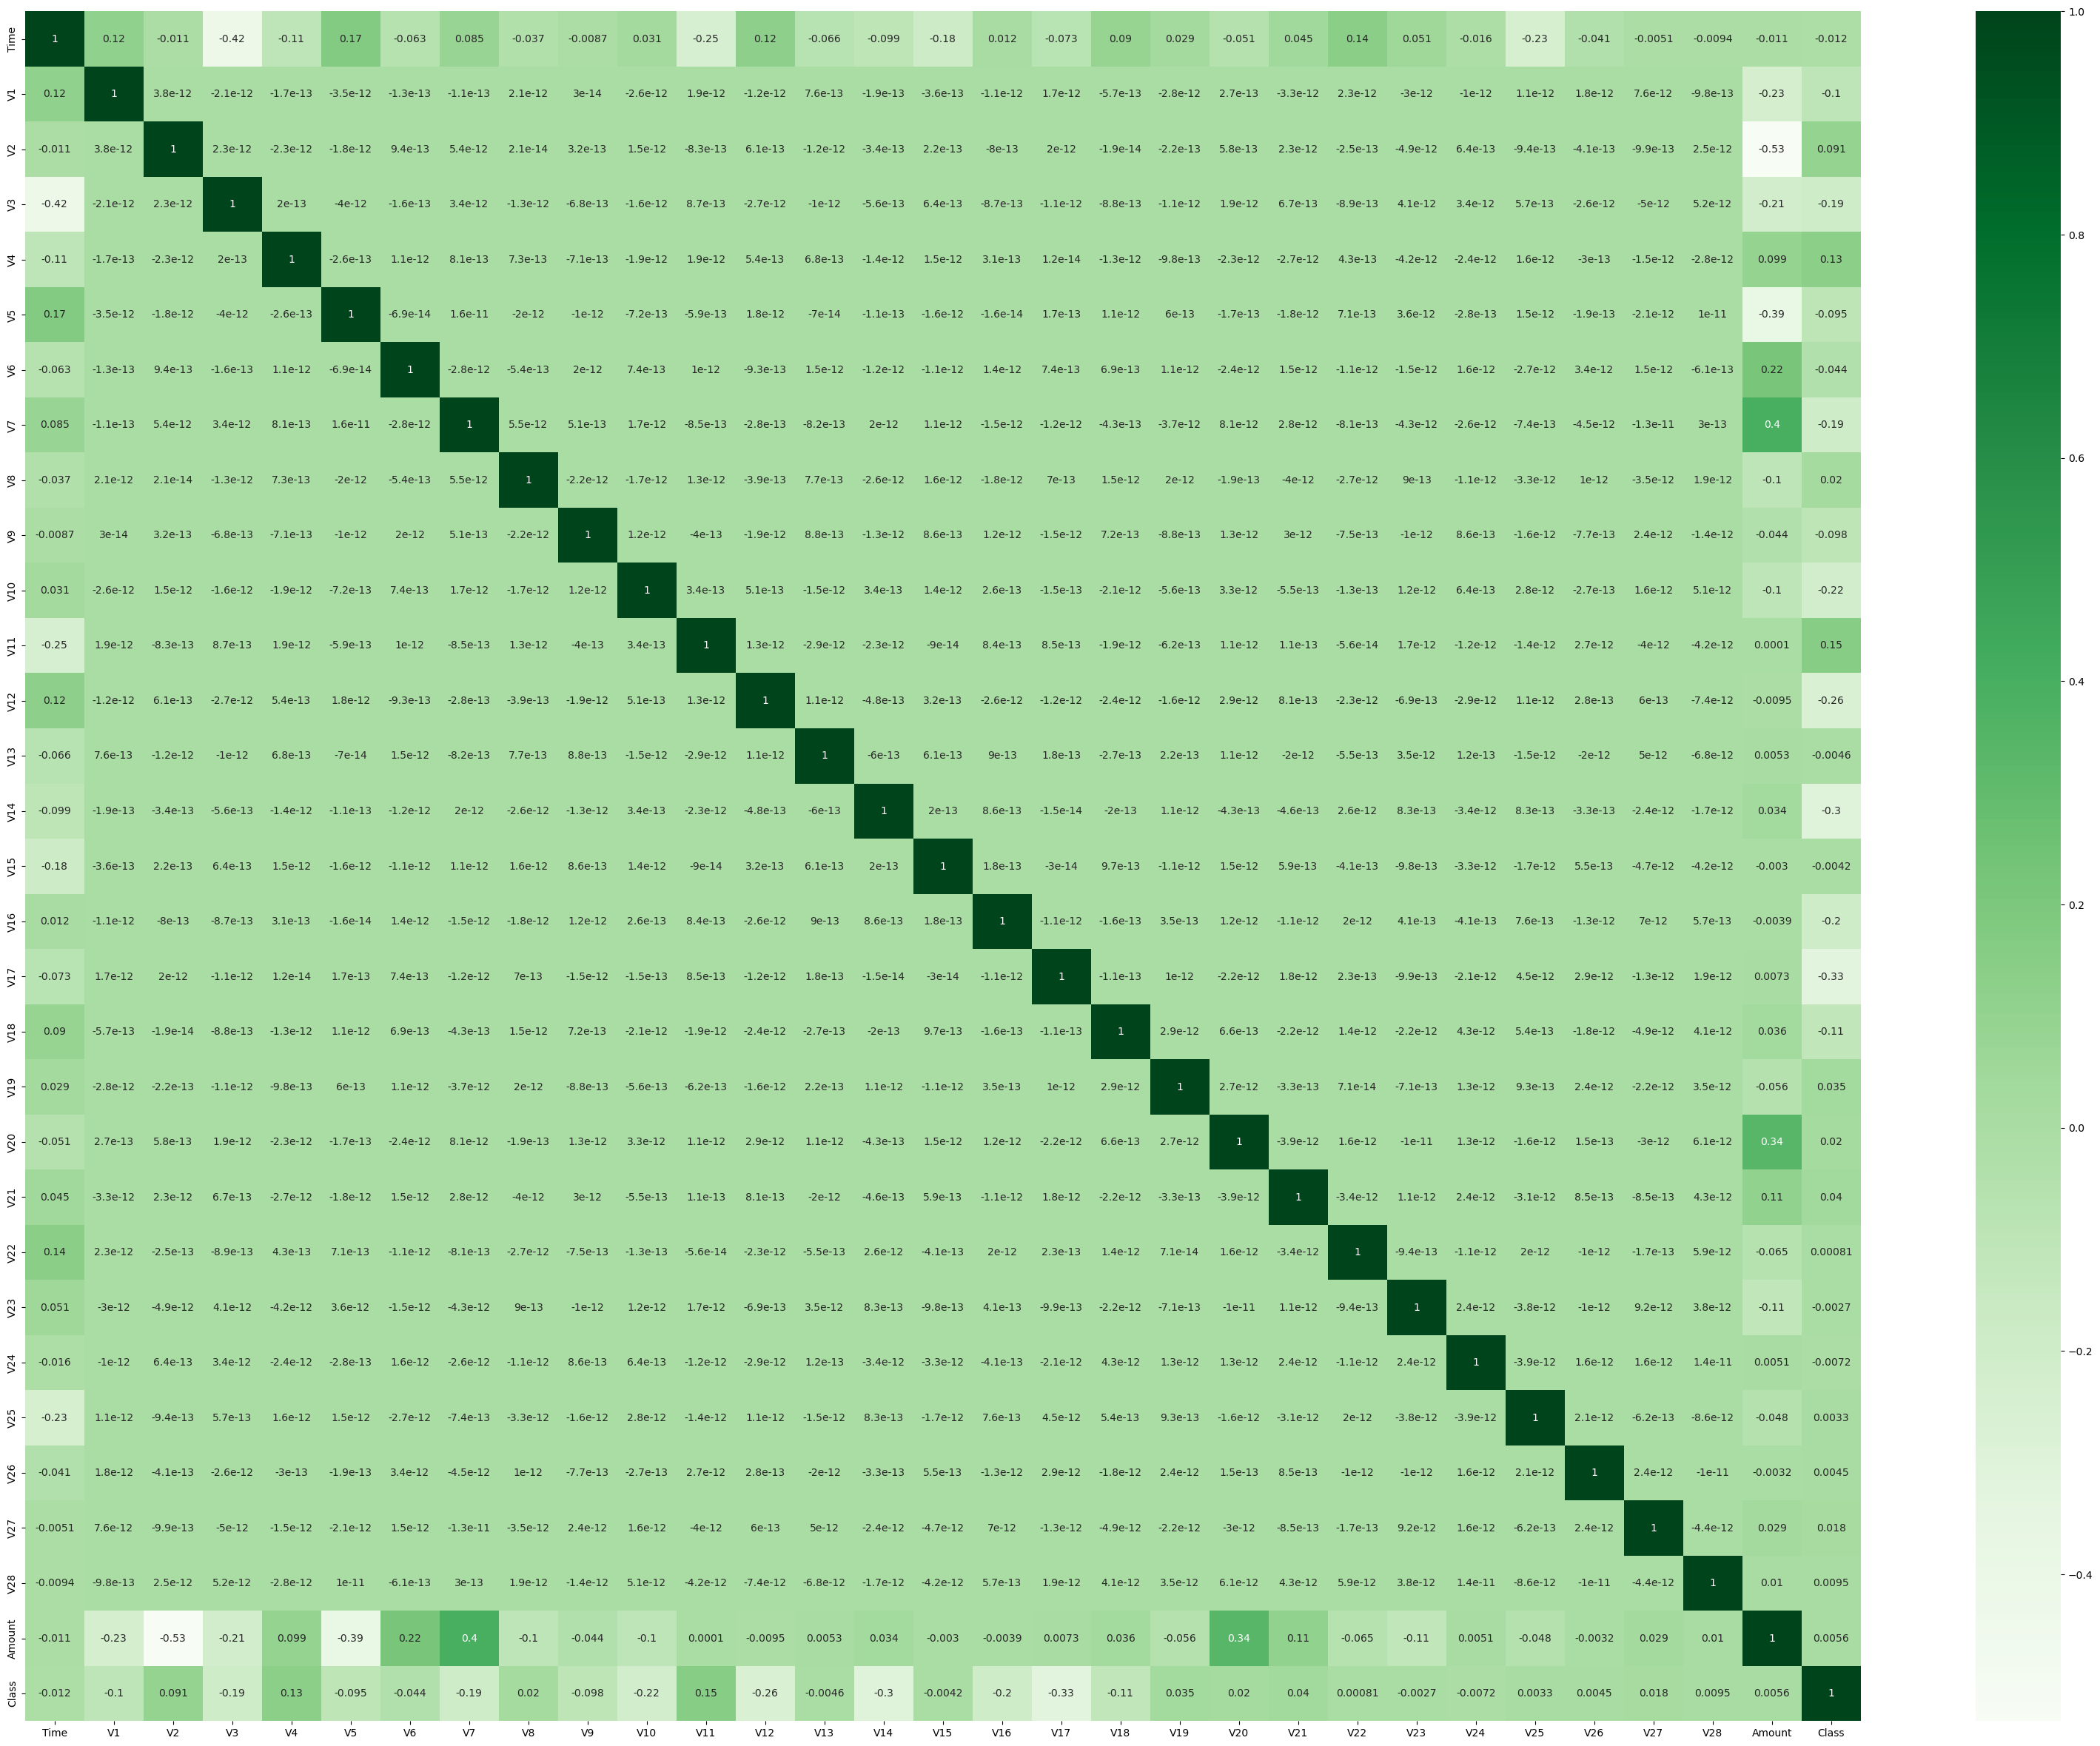

In [13]:
#correlation between each of featurs in DataFrame  
plt.figure(figsize=(40,30))
sns.heatmap(data=df.corr(),annot=True,cmap='Greens')

### Machine learning

spliting features and Target 

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

feature importances/ selection -> which feature having great impact on target value

In [15]:
#choosing the model
feat=ExtraTreesClassifier()

In [16]:
#fitting the model
feat.fit(x,y)

ExtraTreesClassifier()

In [17]:
#array of impact value
feat.feature_importances_

array([0.01612588, 0.01300998, 0.01396217, 0.03032272, 0.03345916,
       0.01241032, 0.01213634, 0.0219986 , 0.01594139, 0.03081915,
       0.06803669, 0.07794629, 0.10389501, 0.01280302, 0.1204384 ,
       0.01166218, 0.07046502, 0.14872861, 0.04080031, 0.01376736,
       0.01382999, 0.01762137, 0.01331548, 0.01076622, 0.01230828,
       0.01037454, 0.01466292, 0.01302173, 0.01288914, 0.01248175])

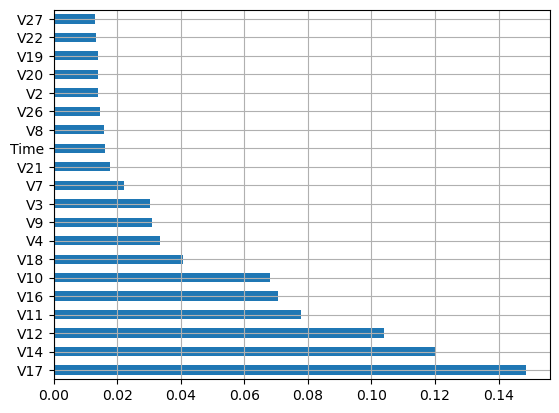

In [18]:
# plot those features having great impact on target value
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.grid()

In [19]:
#Extracting the importances features name
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)
plots=feat_imp.nlargest(18)

In [20]:
#importances features name
plots.index

Index(['V17', 'V14', 'V12', 'V11', 'V16', 'V10', 'V18', 'V4', 'V9', 'V3', 'V7',
       'V21', 'Time', 'V8', 'V26', 'V2', 'V20', 'V19'],
      dtype='object')

In [21]:
#Columns name of "x" dataframe 
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [22]:
#create new DataFrame of importance features 
new_x=x[plots.index]

In [23]:
#show top 5 datapoint of "new_x" dataframe
new_x.head()

,V17,V14,V12,V11,V16,V10,V18,V4,V9,V3,V7,V21,Time,V8,V26,V2,V20,V19
0,0.21,-0.31,-0.62,-0.55,-0.47,0.09,0.03,1.38,0.36,2.54,0.24,-0.02,0.00,0.10,-0.19,-0.07,0.25,0.40
1,-0.11,-0.14,1.07,1.61,0.46,-0.17,-0.18,0.45,-0.26,0.17,-0.08,-0.23,0.00,0.09,0.13,0.27,-0.07,-0.15
2,1.11,-0.17,0.07,0.62,-2.89,0.21,-0.12,0.38,-1.51,1.77,0.79,0.25,1.00,0.25,-0.14,-1.34,0.52,-2.26
3,-0.68,-0.29,0.18,-0.23,-1.06,-0.05,1.97,-0.86,-1.39,1.79,0.24,-0.11,1.00,0.38,-0.22,-0.19,-0.21,-1.23
4,-0.24,-1.12,0.54,-0.82,-0.45,0.75,-0.04,0.40,0.82,1.55,0.59,-0.01,2.00,-0.27,0.50,0.88,0.41,0.80


In [24]:
#checking no of rows and no of columns in "x" 
x.shape

(284807, 30)

In [25]:
#checking no of rows and no of columns in 'new_x'
new_x.shape

(284807, 18)

split the training and testing set

In [26]:
skf=StratifiedKFold(n_splits=10)

In [27]:
for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [28]:
for train_index,test_index in skf.split(new_x,y):
    x_new_train,x_new_test=new_x.iloc[train_index],new_x.iloc[test_index]
    y_new_train,y_new_test=y.iloc[train_index],y.iloc[test_index]

In [29]:
#checking no of rows and no of columns in 'x_train'
x_train.shape

(256327, 30)

In [30]:
#checking no of rows and no of columns in 'x_new_train'
x_new_train.shape

(256327, 18)

choosing the model

In [31]:
decision=DecisionTreeClassifier()
randomf=RandomForestClassifier()

#hyper parameter tuning for random forest classifier

In [32]:
#Assign the value to the Parameter 
n_estimators=[int(i) for i in np.linspace(100,1200,12)]
max_features=['auto',"sqrt"]
max_depth=[int(i) for i in np.linspace(5,30,5)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [33]:
#Store the value in dictionary form
parameters={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [34]:
#checking the parameter value
parameters

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 11, 17, 23, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [35]:
#hyper parameter tuning 
rf_model=RandomizedSearchCV(estimator=randomf,
                           param_distributions=parameters,
                           scoring='neg_mean_squared_error',
                           n_jobs=1,
                           cv=5,
                           verbose=2,
                           random_state=42)

In [36]:
#rf_model.fit(x_train,y_train)

#auto ML lazy predict  

In [39]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(x_train, x_test, y_train, y_test)

Trained the model

In [42]:
randomf.fit(x_train,y_train)

RandomForestClassifier()

testing the model

In [43]:
y_pred=randomf.predict(x_test)

#checking the accuracy 

In [44]:
accuracy_score(y_test,y_pred)

0.9994030898876405

Trained the model

In [45]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

testing the model

In [47]:
y_deci_pred=decision.predict(x_test)

#checking the accuracy

In [48]:
accuracy_score(y_test,y_deci_pred)

0.9989466292134831

trained the model

In [49]:
randomf.fit(x_new_train,y_new_train)

RandomForestClassifier()

In [50]:
y_ran_pred=randomf.predict(x_new_test)

In [51]:
accuracy_score(y_new_test,y_ran_pred)

0.9994030898876405